### Data Visualization for Better Understanding of Data

In [21]:
import os 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np

### Removing Images with No Annotations

In [22]:
def check_images_without_annotations(image_dir, label_dir):
    
    images_without_annotations = []
    
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    
    for image in image_files:
        
        #get the corresponding label file 
        label_file = os.path.splitext(image)[0] + '.txt'
        label_path = os.path.join(label_dir, label_file)
        
        #check if the label files exists and has content 
        if not os.path.exists(label_path):
            images_without_annotations.append(image)
        
        else:
            
            if os.stat(label_path).st_size == 0:
                images_without_annotations.append(image)
                
    return images_without_annotations, len(images_without_annotations)

In [23]:
root = 'dataset/prod/yolo_dataset/train'
image_directory = os.path.join(root, 'resized_images')
label_directory = os.path.join(root, 'labels')

In [24]:
unannotated_images, count = check_images_without_annotations(image_directory, label_directory)

print(f'Number of images without annotations: {count}')
if unannotated_images:
    print(f'Images without annotations')
    for image in unannotated_images:
        print(image)
    

Number of images without annotations: 0


### Visualization of Unannotated vs All Images

In [25]:
import os
import matplotlib.pyplot as plt

def check_and_plot_unannotated_images(image_dir, label_dir):
    
    images_without_annotations = []
    
    # List all images in the image directory
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    
    for image_file in image_files:
        # Get the corresponding label file
        label_file = os.path.splitext(image_file)[0] + '.txt'
        label_path = os.path.join(label_dir, label_file)
        
        # Check if the label file exists and has content
        if not os.path.exists(label_path) or os.stat(label_path).st_size == 0:
            # Label file doesn't exist or is empty
            images_without_annotations.append(image_file)
    
    # Calculate percentage of unannotated and annotated images
    total_images = len(image_files)
    unannotated_count = len(images_without_annotations)
    annotated_count = total_images - unannotated_count
    percentage_annotated = (annotated_count / total_images) * 100 if total_images > 0 else 0
    percentage_unannotated = (unannotated_count / total_images) * 100 if total_images > 0 else 0

    print(f"Total images: {total_images}")
    print(f"Number of images without annotations: {unannotated_count}")
    print(f"Percentage of unannotated images: {percentage_unannotated:.2f}%")
    print(f"Percentage of annotated images: {percentage_annotated:.2f}%")
    
    # Plot histogram
    labels = ['Annotated Images', 'Unannotated Images']
    percentages = [percentage_annotated, percentage_unannotated]
    
    plt.bar(labels, percentages, color=['green', 'red'])
    plt.xlabel('Image Type')
    plt.ylabel('Percentage')
    plt.title('Percentage of Annotated vs Unannotated Images')
    plt.ylim(0, 100)  # Set y-axis limit to 100%
    
    # Show the percentage on top of each bar
    for i, v in enumerate(percentages):
        plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

    plt.show()
    
    return images_without_annotations, percentage_unannotated



Total images: 3807
Number of images without annotations: 0
Percentage of unannotated images: 0.00%
Percentage of annotated images: 100.00%


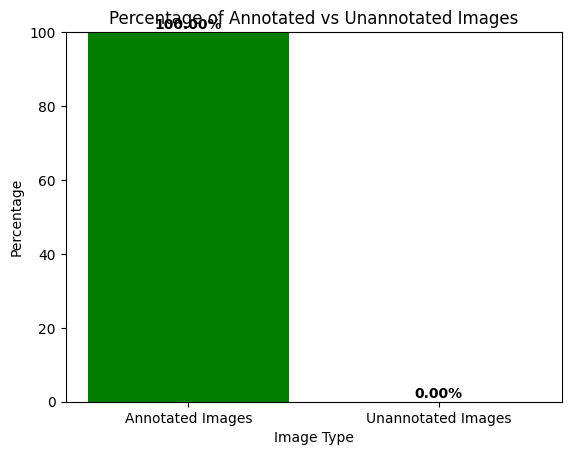

Found 0 unannotated images.


In [26]:

# Check and plot the percentage of unannotated images
unannotated_images, unannotated_percentage = check_and_plot_unannotated_images(
    image_directory, 
    label_directory
)

# Print the result
print(f"Found {len(unannotated_images)} unannotated images.")

#### Deleting the Unannotated Images

In [27]:
def check_and_remove_unannotated_images(image_dir, label_dir, remove_images=False):

    images_without_annotations = []
    
    # List all images in the image directory
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    
    for image_file in image_files:
        # Get the corresponding label file
        label_file = os.path.splitext(image_file)[0] + '.txt'
        label_path = os.path.join(label_dir, label_file)
        
        # Check if the label file exists and has content
        if not os.path.exists(label_path) or os.stat(label_path).st_size == 0:
            # Label file doesn't exist or is empty
            images_without_annotations.append(image_file)
    
    # Calculate percentage of unannotated images
    total_images = len(image_files)
    unannotated_count = len(images_without_annotations)
    percentage_unannotated = (unannotated_count / total_images) * 100 if total_images > 0 else 0

    print(f"Total images: {total_images}")
    print(f"Number of images without annotations: {unannotated_count}")
    print(f"Percentage of unannotated images: {percentage_unannotated:.2f}%")
    
    if remove_images and unannotated_count > 0:
        # Delete unannotated images and corresponding label files
        for image_file in images_without_annotations:
            image_path = os.path.join(image_dir, image_file)
            label_file = os.path.splitext(image_file)[0] + '.txt'
            label_path = os.path.join(label_dir, label_file)
            
            # Remove the image file
            if os.path.exists(image_path):
                os.remove(image_path)
                print(f"Deleted image: {image_file}")
                
            # Remove the corresponding label file if it exists
            if os.path.exists(label_path):
                os.remove(label_path)
                print(f"Deleted label: {label_file}")
    
    return images_without_annotations, percentage_unannotated

In [28]:
#check and optionally remove unnannotated images
unannotated_images, unannotated_percentage = check_and_remove_unannotated_images(
    image_directory,
    label_directory,
    remove_images=True
)


print(f"Found {len(unannotated_images)} unannotated images.")

Total images: 3807
Number of images without annotations: 0
Percentage of unannotated images: 0.00%
Found 0 unannotated images.


### Data conversion to absolution

This function provides a method to covnert the polygons to absolute values of the pixels.

Initially we get the polygons assigned and it's respective classification in this class


In [29]:
def load_yolo_annotation(label_path, img_width, img_height):
    polygons = []
    labels = []
    
    with open(label_path, 'r') as file: 
        for line in file.readlines():
            data = list(map(float, line.strip().split()))
            class_id = int(data[0])
            coordinates = data[1:] #remaining part of the line are polygon coordinates 
            
            #convert normalzied YOLO polygon coordinates to absolute pixel values 
            #x coordinates to img_width, y coordinates to img_height
            
            polygon = []
            for i in range(0, len(coordinates), 2 ):
                x = int(coordinates[i] * img_width)
                y = int(coordinates[i +1 ] * img_height)
                polygon.append((x,y))
                
            polygons.append(polygon)
            labels.append(class_id)
            
    return polygons, labels

In [30]:
def visualize_image(image_path, label_path, class_name):
    
    #read image 
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_height, img_width, _ = img.shape
    
    #load yolo annotations 
    polygons, labels = load_yolo_annotation(label_path, img_width, img_height)
    
    #plot images
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    
    #draw polyggons and labels 
    for polygon, label in zip(polygons, labels):
        
        #draw polygon 
        polygon = np.array(polygon, np.int32).reshape((-1,1,2)) #Reshaping for opencv 
        cv2.polylines(img, [polygon], isClosed=True, color=(0,255,0), thickness=1) #draw polygon
        
        #get the first point of the polygon to position the label
        x, y = polygon[0][0]
        
        #label with class name next to the base point 
        cv2.putText(img, class_name[label], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 1)
       
    #show the image with polygons and labels 
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    

        

#### Visualization Example

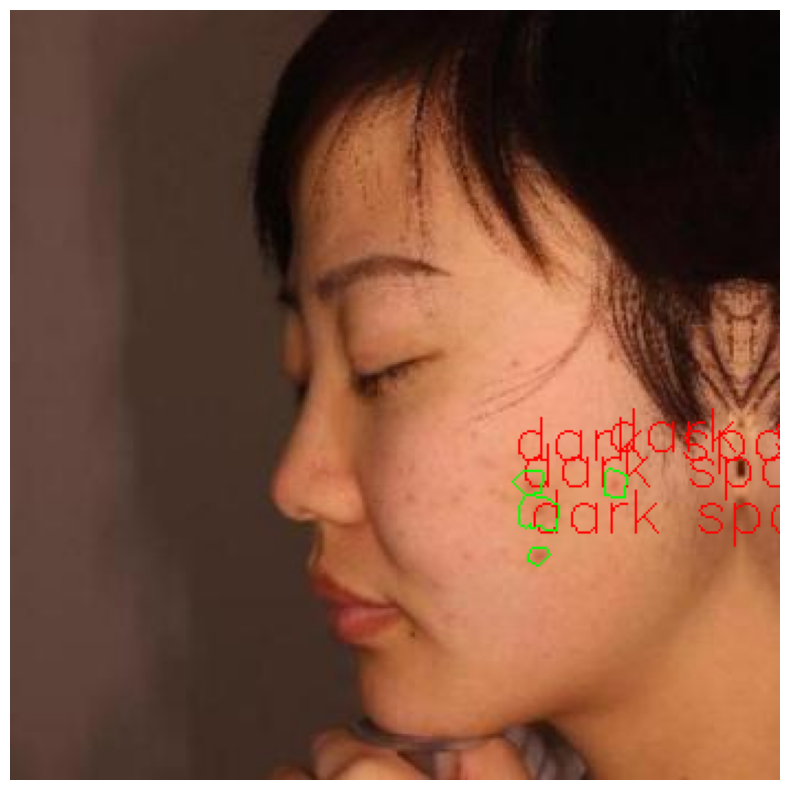

In [31]:
root_image_path = "dataset/prod/yolo_dataset/test/resized_images"
root_label_path = "dataset/prod/yolo_dataset/test/labels"
class_names = ['blackheads', 'dark spot', 'nodules', 'papules', 'pustules', 'whiteheads']

img_name = 'levle0_516_jpg.rf.d9b266f1d6e762817b25cab07c7d71f7.jpg'
label_name = img_name[:-3] + 'txt'

joined_image = root_image_path + '/' + img_name
joined_label = root_label_path + '/' + label_name

visualize_image(joined_image, joined_label, class_names)


### Data Conversion from YOLO to COCO
Currently the data format is a text based polygonal coordinates assigned to each classification as an integer.

There are couple of changes that need to be made.
1. Conversion of normalized data to absolute pixel values 
2. Conversion of the yolo values to the COCO values 

#### Conversion of Normalized to Absolute

#### Conversion of Data to COCO

In [32]:
import json 
import os
from PIL import Image

In [41]:
#Get the dimensions of an image (width, height)

def get_image_size(image_path):
    with Image.open(image_path) as img:
        return img.width, img.height

In [42]:
#converting normalized values to absolute values 
def convert_to_absolute_data(normalized_coords, image_width, image_height):
    
    absolute_coords = []
    for i in range(0, len(normalized_coords), 2):
        x_abs = normalized_coords[i] * image_width
        y_abs = normalized_coords[i+1] * image_height
        absolute_coords.append([x_abs, y_abs])
    return absolute_coords

In [43]:
#Flatten the polygon list (list of (x,y) pairs) into a single list of alternating x and y coordinates 
def flatten_polygon(polygon):
    return [coord for point in polygon for coord in point]


In [44]:
def create_coco_annot(image_dir, label_dir, output_file):
    images = []
    annotations = []
    class_names = ['blackheads', 'dark spot', 'nodules', 'papules', 'pustules', 'whiteheads']
    categories = [
        {"id": 0, "name": class_names[0]},
        {"id": 1, "name": class_names[1]},
        {"id": 2, "name": class_names[2]},
        {"id": 3, "name": class_names[3]},
        {"id": 4, "name": class_names[4]},
        {"id": 5, "name": class_names[5]},
    ]

    annotation_id = 1

    for idx, img_file in enumerate(os.listdir(image_dir)):
        if img_file.endswith('.jpg'):
            image_id = idx + 1
            img_path = os.path.join(image_dir, img_file)

            # Get the image dimensions
            image_width, image_height = get_image_size(img_path)

            images.append({
                "id": image_id,
                "file_name": img_file,
                "width": image_width,
                "height": image_height
            })

            # Get the corresponding label file
            label_file = os.path.join(label_dir, img_file.replace('.jpg', '.txt'))
            with open(label_file, 'r') as f:
                for line in f:
                    class_id, *coords = map(float, line.split())
                    class_id = int(class_id)

                    # Convert normalized coordinates to absolute pixel values
                    polygon = convert_to_absolute_data(coords, image_width, image_height)

                    # Flatten the polygon to match the COCO format
                    flattened_polygon = flatten_polygon(polygon)

                    # Create bounding box for initial proposals
                    x_min = min(p[0] for p in polygon)
                    y_min = min(p[1] for p in polygon)
                    x_max = max(p[0] for p in polygon)
                    y_max = max(p[1] for p in polygon)

                    bbox = [x_min, y_min, x_max - x_min, y_max - y_min]

                    # COCO Annotation
                    annotations.append({
                        "id": annotation_id,
                        "image_id": image_id,
                        "category_id": class_id,
                        "segmentation": [flattened_polygon],  # Corrected to be a flattened list
                        "bbox": bbox,
                        "iscrowd": 0
                    })
                    annotation_id += 1

    # Ensure proper indentation to write COCO annotations after all images are processed
    coco_format = {
        "images": images,
        "annotations": annotations,
        "categories": categories
    }

    with open(output_file, 'w') as outfile:
        json.dump(coco_format, outfile, indent=4)

##### Conversion of Training Training Data to COCO -> Resized

In [47]:
#example usage 
image_dir = 'dataset/prod/yolo_dataset/train/resized_images/'
label_dir = 'dataset/prod/yolo_dataset/train/labels/'
output_file = 'dataset/prod/yolo_dataset/train/resized_labels/coco_annotation.json'

create_coco_annot(image_dir, label_dir, output_file)

##### Conversion of Test Validation Data to COCO

In [48]:
#example usage 
image_dir = 'dataset/prod/yolo_dataset/valid/resized_images/'
label_dir = 'dataset/prod/yolo_dataset/valid/labels/'
output_file = 'dataset/prod/yolo_dataset/valid/resized_labels/coco_annotation.json'

create_coco_annot(image_dir, label_dir, output_file)

### COCO VISUALIZATION

In [49]:
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_coco_annotations(coco_json, image_dir):
    # Load the COCO JSON file
    with open(coco_json, 'r') as f:
        coco_data = json.load(f)

    # Get the first image and its annotations
    first_image = coco_data['images'][1]  # Select the first image
    img_id = first_image['id']
    img_file = first_image['file_name']
    img_path = os.path.join(image_dir, img_file)

    # Load the image using OpenCV
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization

    # Get the annotations for this image
    annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == img_id]

    # Iterate over the annotations and draw polygons
    for ann in annotations:
        class_id = ann['category_id']  # Get class ID
        segmentation = ann['segmentation'][0]  # Get the first polygon segmentation

        # Convert the segmentation into a list of (x, y) tuples
        polygon = [(int(segmentation[i]), int(segmentation[i+1])) for i in range(0, len(segmentation), 2)]

        # Draw the polygon on the image
        pts = np.array(polygon, np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=2)

        # Get the class label from the categories list
        category = next(cat for cat in coco_data['categories'] if cat['id'] == class_id)
        label = category['name']

        # Put the classification label near the polygon
        cv2.putText(image, label, polygon[0], cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    # Display the image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()


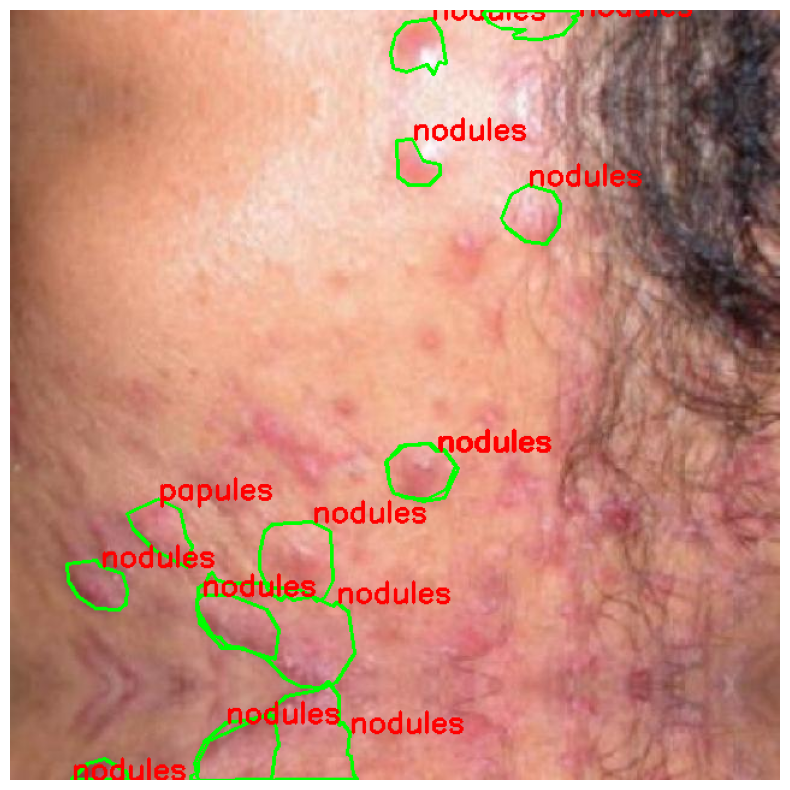

In [50]:
# Example usage
coco_json = 'dataset/prod/yolo_dataset/test/annotations/coco_annotation.json'
image_dir = 'dataset/prod/yolo_dataset/test/images/'

visualize_coco_annotations(coco_json, image_dir)


### Simple Mask R-CNN Transfer Learning 

In [51]:
from torchvision.datasets import CocoDetection
from torchvision import transforms as T

In [52]:
# Define the dataset class
class CustomCocoDataset(CocoDetection):
    def __init__(self, root, annFile, transforms=None):
        super(CustomCocoDataset, self).__init__(root, annFile)
        self.transforms = transforms

    def __getitem__(self, idx):
        # Load the image and annotations
        img, target = super(CustomCocoDataset, self).__getitem__(idx)

        # Apply the transform only to the image, and return both the image and annotations
        if self.transforms is not None:
            img = self.transforms(img)  # Apply transforms only to the image

        return img, target


In [54]:
train_dataset = CustomCocoDataset(
    root='dataset/prod/yolo_dataset/train/resized_images',  # Path to your train images
    annFile='dataset/prod/yolo_dataset/train/resized_labels/coco_annotation.json',  # Path to your COCO-format JSON
    transforms=T.ToTensor()  # Example transformation (convert to tensor)
)


loading annotations into memory...
Done (t=0.41s)
creating index...
index created!


In [56]:
valid_dataset = CustomCocoDataset(
    root='dataset/prod/yolo_dataset/valid/resized_images',  # Path to your valid images
    annFile='dataset/prod/yolo_dataset/valid/resized_labels/coco_annotation.json',  # Path to your COCO-format JSON
    transforms=T.ToTensor()  # Example transformation (convert to tensor)
)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


#### Visualization of COCO Dataset from COCODATASET

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 
import torchvision.transforms as T

##### Visualizing Function

In [58]:
def visualize_coco_sample(coco, img_id, root):
    
    #load image information using COCO API
    img_info = coco.loadImgs(img_id)[0]
    img_path = f"{root}/{img_info['file_name']}"
    
    #open the image 
    img = Image.open(img_path).convert("RGB")	
    
    #optionally, apply transforms (eg, ToTensor, augmentations). 
    transform = T.ToTensor()
    img_tensor = transform(img)
    img_np = img_tensor.permute(1,2,0).numpy()  #Change the order of dimensions and to numpy array
    
    #display the image 
    plt.figure(figsize=(10,10))
    plt.imshow(img_np)
    
    #load annotatios for the image 
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)
    
    #Draw annotations (bounding boxes and segmentations)
    for ann in anns:
        bbox = ann['bbox'] #COCO Format 
        x_min, y_min, width, height = bbox
        rect = plt.Rectangle((x_min, y_min), width, height, fill=False, edgecolor='red', linewidth=2)  
        plt.gca().add_patch(rect)
        
        #if segmentation is available, draw the polygons 
        if 'segmentation' in ann:
            
            segmentation = ann['segmentation'][0] #polygon format
            poly_points = [(segmentation[i], segmentation[i+1]) for i in range(0, len(segmentation), 2)]
            poly = plt.Polygon(poly_points, edgecolor='blue', fill=True, alpha=0.4)
            plt.gca().add_patch(poly)
            
        #Display category label 
        cat_id = ann['category_id']
        cat_name = coco.loadCats(cat_id)[0]['name']
        plt.text(x_min, y_min-5, cat_name, color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
        
    plt.axis('off')
    plt.show()
    
    
    
          

##### Instantiation and Validation of Data

In [62]:
from pycocotools.coco import COCO

In [64]:
root_dir = 'dataset/prod/yolo_dataset/train/resized_images'
ann_file = 'dataset/prod/yolo_dataset/train/resized_labels/coco_annotation.json'

#initialize COCO API For instance annotations
coco = COCO(ann_file)

loading annotations into memory...
Done (t=0.45s)
creating index...
index created!


Image Info:  {'id': 6, 'file_name': '01F3MMV6NBB013AEV2SH04SRQ9_jpeg_jpg.rf.cbf35640792a9389db57fa8da23c55fe.jpg', 'width': 350, 'height': 350}
Annotations:  [{'id': 17, 'image_id': 6, 'category_id': 4, 'segmentation': [[146.97265625, 183.544921875, 137.744140625, 177.05078125, 125.439453125, 179.1015625, 120.3125, 193.115234375, 122.36328125, 197.900390625, 134.326171875, 207.8125, 144.23828125, 209.521484375, 147.998046875, 205.078125, 153.80859375, 204.736328125, 153.80859375, 198.583984375, 146.97265625, 183.544921875]], 'bbox': [120.3125, 177.05078125, 33.49609375, 32.470703125], 'iscrowd': 0}, {'id': 18, 'image_id': 6, 'category_id': 4, 'segmentation': [[213.623046875, 197.55859375, 204.39453125, 202.001953125, 202.34375, 209.521484375, 209.521484375, 220.1171875, 217.724609375, 222.8515625, 230.37109375, 223.193359375, 234.47265625, 220.458984375, 234.47265625, 211.572265625, 228.662109375, 205.078125, 213.623046875, 197.55859375]], 'bbox': [202.34375, 197.55859375, 32.12890625,

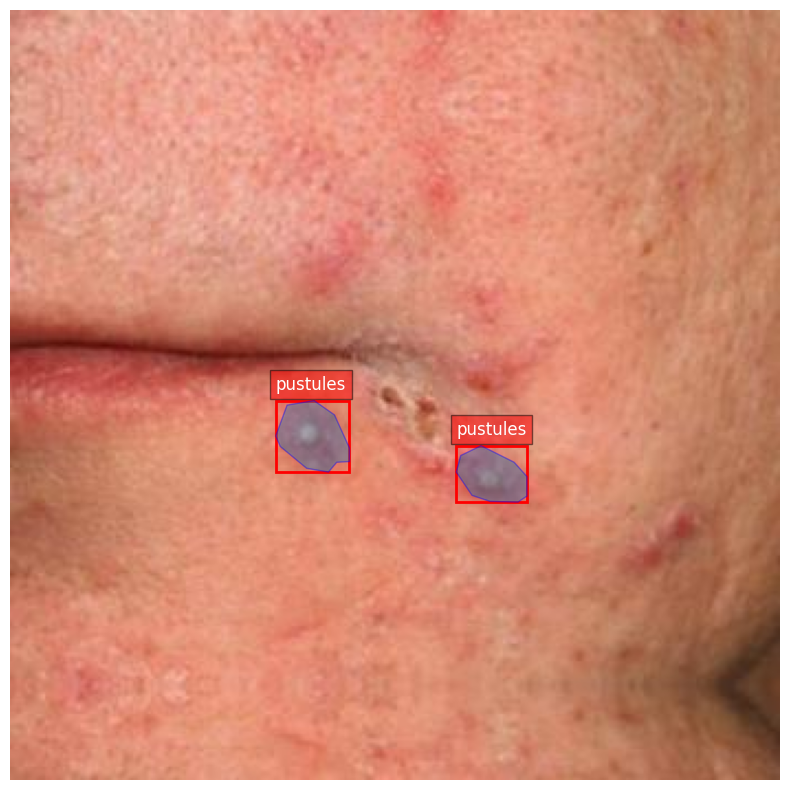

In [65]:
img_ids = coco.getImgIds()
img_id = img_ids[5] #visualize the first image in the dataset 

img_info = coco.loadImgs(img_id)[0]
ann_ids = coco.getAnnIds(imgIds=img_id)
anns = coco.loadAnns(ann_ids)

print("Image Info: ", img_info)
print("Annotations: ", anns)

visualize_coco_sample(coco, img_id, root_dir)

### Validating COCO Annotations with Reference to Images

In [66]:
def validate_coco_annotations(image_dir, coco_annotation_file):
    """
    Validates whether all images in the COCO annotations have their respective image files in the dataset.

    Args:
    - image_dir: Directory where the images are stored.
    - coco_annotation_file: Path to the COCO annotation JSON file.

    Returns:
    - A list of missing images and images that exist without annotations.
    """
    # Load COCO annotations
    with open(coco_annotation_file, 'r') as f:
        coco_data = json.load(f)

    coco = COCO(coco_annotation_file)

    # Get all image IDs and file names from COCO annotations
    coco_images = coco_data['images']
    annotation_image_ids = [img['file_name'] for img in coco_images]

    # List all images in the image directory
    actual_images = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

    # Find images in annotations but not in the image directory
    missing_images = [img for img in annotation_image_ids if img not in actual_images]

    # Find images in the directory but not in annotations
    unused_images = [img for img in actual_images if img not in annotation_image_ids]

    total_images = len(actual_images)
    missing_count = len(missing_images)
    unused_count = len(unused_images)

    print(f"Total images in directory: {total_images}")
    print(f"Images with annotations: {len(annotation_image_ids)}")
    print(f"Missing images (in annotations but not in directory): {missing_count}")
    print(f"Unused images (in directory but not in annotations): {unused_count}")

    if missing_count > 0:
        print("Missing image files:", missing_images)

    if unused_count > 0:
        print("Unused images:", unused_images)

    return missing_images, unused_images


In [68]:

image_directory = 'dataset/prod/yolo_dataset/train/resized_images'  # Path to your image directory
coco_annotation_path = 'dataset/prod/yolo_dataset/train/resized_labels/coco_annotation.json'  # Path to your COCO annotation file

# Validate COCO annotations
missing_images, unused_images = validate_coco_annotations(image_directory, coco_annotation_path)


loading annotations into memory...
Done (t=0.30s)
creating index...
index created!
Total images in directory: 3807
Images with annotations: 3807
Missing images (in annotations but not in directory): 0
Unused images (in directory but not in annotations): 0


### Finding the Distinct Classes in COCO Json

In [69]:
#this method shows the classes that are actually available in the dataset
def find_distinct_classes(coco_annotation_file):
    # Load the COCO annotation file
    with open(coco_annotation_file, 'r') as file:
        coco_data = json.load(file)

    # Extract categories (classes) from the annotation file
    categories = coco_data.get('categories', [])
    
    # Get all distinct class names
    distinct_classes = {category['name'] for category in categories}

    # Print or return the distinct classes
    return distinct_classes

In [70]:
def find_actual_distinct_classes(coco_annotation_file):
    # Load the COCO annotation file
    with open(coco_annotation_file, 'r') as file:
        coco_data = json.load(file)

    # Extract categories and create a mapping from category_id to class name
    category_mapping = {category['id']: category['name'] for category in coco_data.get('categories', [])}

    # Extract the category IDs used in the annotations
    category_ids_in_annotations = {annotation['category_id'] for annotation in coco_data.get('annotations', [])}

    # Map the used category IDs to actual class names
    actual_distinct_classes = {category_mapping[cat_id] for cat_id in category_ids_in_annotations if cat_id in category_mapping}

    # Return or print the actual distinct classes
    return actual_distinct_classes

In [72]:

coco_annotation_path = 'dataset/prod/yolo_dataset/train/resized_labels/coco_annotation.json'
distinct_classes = find_distinct_classes(coco_annotation_path)
print("Classes according the categories:", distinct_classes)

actual_distinct_classes = find_actual_distinct_classes(coco_annotation_path)
print("Classes according to the annotations", actual_distinct_classes )

Classes according the categories: {'whiteheads', 'blackheads', 'pustules', 'dark spot', 'papules', 'nodules'}
Classes according to the annotations {'whiteheads', 'blackheads', 'pustules', 'dark spot', 'papules', 'nodules'}
